<a href="https://colab.research.google.com/github/Shailendra114/Appliances-Energy-Prediction/blob/main/Appliances_Energy_Prediction(Machine_Learnng_Capstone_Project).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Appliances Energy Prediction


In this time of global uncertainty world needs energy and in increasing quantities to support economic and social progress and build a better quality of life, in particular in developing countries. But even in today’s time there are many places especially in developing world where there are outages. These outages are primary because of excess load consumed by appliances at home. Heating and cooling appliances takes most power in house. In this project we will be analysing the appliance usage in the house gathered via home sensors. All readings are taken at 10 mins intervals for 4.5 months . The goal is to predict energy consumption by appliances . In the age of smart homes, ability to predict energy consumption can not only save money for end user but can also help in generating money for user by giving excess energy back to Grid (in case of solar panels usage). In this case regression analysis will be used to predict Appliance energy usage based on data collected from various sensors.


#Problem Statement

 The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru), and merged together with the experimental data sets using the date and time column. Two random variables have been included in the data set for testing the regression models and to filter out non predictive attributes (parameters).
 

#Attribute Information


* date time year-month-day hour:minute:second
* Appliances, energy use in Wh
* lights, energy use of light fixtures in the house in Wh
* T1, Temperature in kitchen area, in Celsius
* RH_1, Humidity in kitchen area, in %
* T2, Temperature in living room area, in Celsius
* RH_2, Humidity in living room area, in %
* T3, Temperature in laundry room area
* RH_3, Humidity in laundry room area, in %
* T4, Temperature in office room, in Celsius
* RH_4, Humidity in office room, in %
* T5, Temperature in bathroom, in Celsius
* RH_5, Humidity in bathroom, in %
* T6, Temperature outside the building (north side), in Celsius
* RH_6, Humidity outside the building (north side), in %
* T7, Temperature in ironing room , in Celsius
* RH_7, Humidity in ironing room, in %
* T8, Temperature in teenager room 2, in Celsius
* RH_8, Humidity in teenager room 2, in %
* T9, Temperature in parents room, in Celsius
* RH_9, Humidity in parents room, in %
* To, Temperature outside (from Chievres weather station), in Celsius
* Pressure (from Chievres weather station), in mm Hg
* RH_out, Humidity outside (from Chievres weather station), in %
* Wind speed (from Chievres weather station), in m/s
* Visibility (from Chievres weather station), in km
* Tdewpoint (from Chievres weather station), Â°C
* rv1, Random variable 1, nondimensional
* rv2, Random variable 2, nondimensional

Where indicated, hourly data (then interpolated) from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis, rp5.ru. Permission was obtained from Reliable Prognosis for the distribution of the 4.5 months of weather data.

#What we have to do ?

Now We have to predict Appliance energy consumption for a house based on factors like temperature, humidity & pressure . In order to achieve this, we need to develop a supervised learning model using regression algorithms. Regression algorithms are used as data consist of continuous features and there are no identification of appliances in dataset.


Before diving deep into the project,we have to undersand the roadmap which we will be following throughout the project.

#Roadmap:-
* Understanding the terms in the problem
* Loading the data into the dataframe
* Cleaning the data
* Extracting the statistics from the data
* EDA(Exploratory data analysis)
* Feature Selection
* Pre-processing data
* Model-Fit
* Conclusion


#Process Outline 



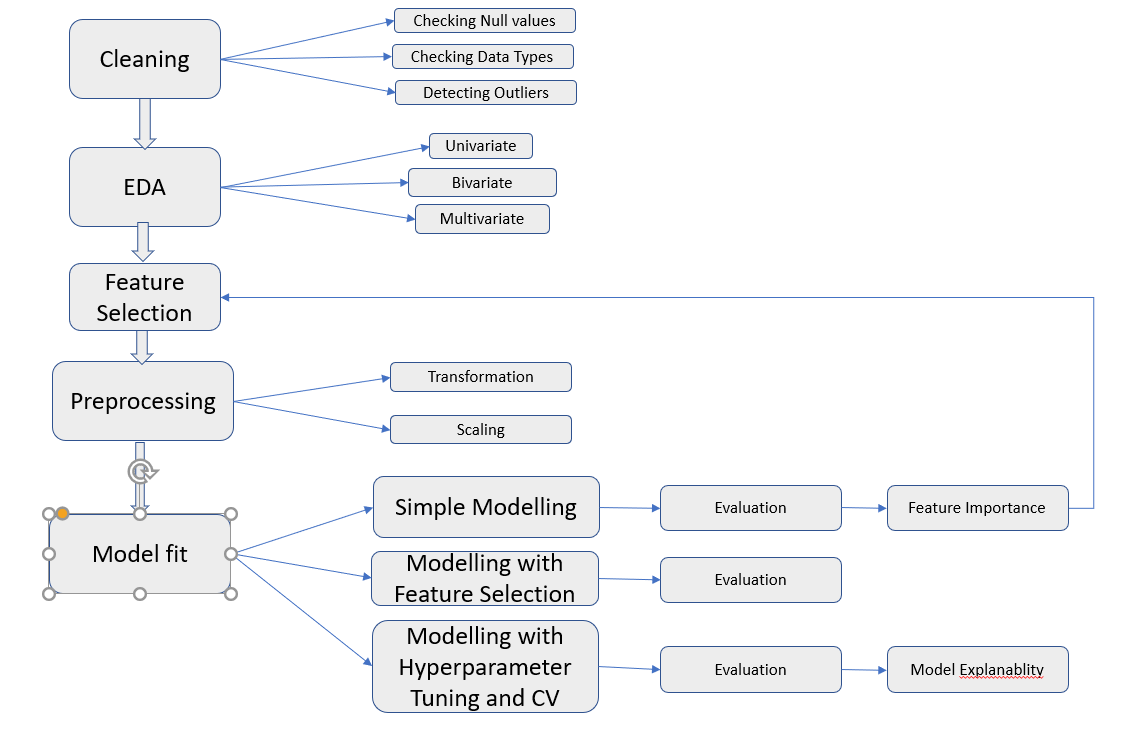

Lets start our project according to our roadmap and process---------

# 1.) Understanding the terms in the dataset


**1.)Relative Humidity:-**
  The amount of water vapour present in air expressed as a percentage of the amount needed for saturation at the same temperature is relative humidity.**For Example**-a relative humidity of 50 percent means the air is holding one half of the water vapor it can hold. Again, this is all dependent on the temperature.As shown the figure below-------


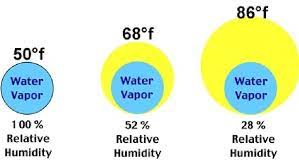

**2.)Visibility:-** Visibility is a measure of the distance at which an object or light can be clearly discerned. It depends only on the transparency of the surrounding air as in the figure below---

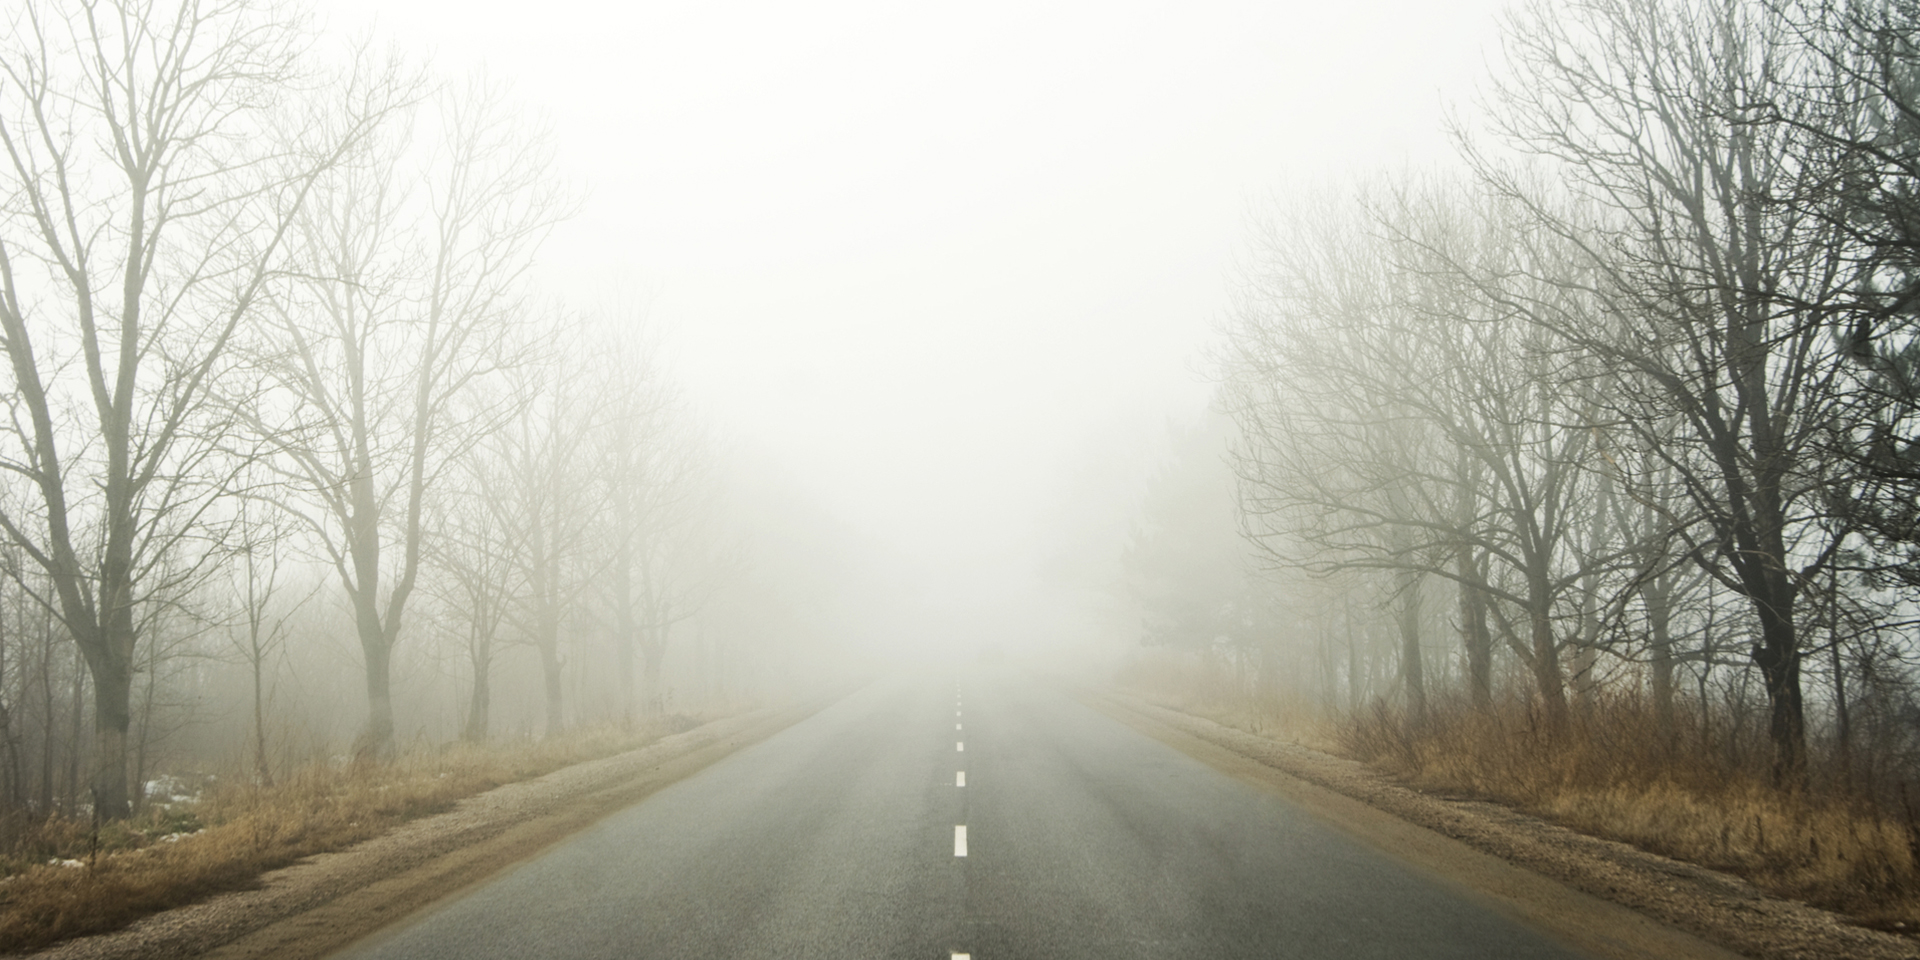

**3.)T-Dewpoint(Temperature of dewpoint)**:- The dew point is the temperature below which the water vapour in a volume of air at a constant pressure will condense into liquid water. It is the temperature at which the air is saturated with moisture.

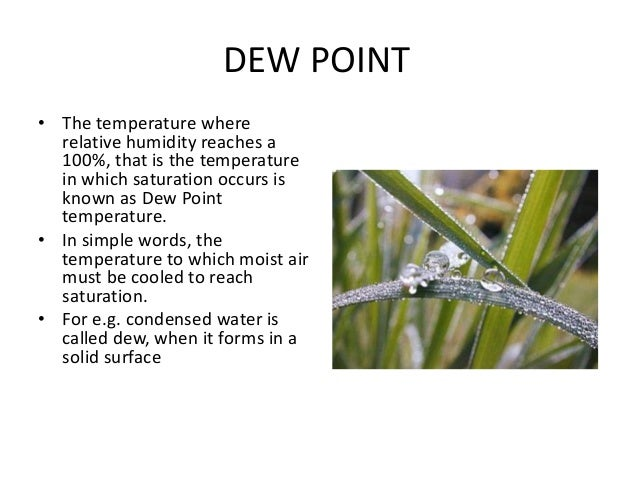

**4.)Windspeed:-** Wind speed is the speed of the weather related air movement from one place to the next.

Wind speeds usually mean the movement of air in an outside environment, but the speed of movement of air inside is also important in many cases, including weather forecasting, aircraft and maritime operations, construction and civil engineering.


High wind speeds yield more power because wind power is proportional to the cube of wind speed.

Approximately 2% of the solar energy striking the Earth’s surface is converted into kinetic energy in wind. Wind turbines convert the wind’s kinetic energy to electricity without emissions.1 The distribution of wind energy is heterogeneous, both across the surface of the Earth and vertically through the atmosphere. Average annual wind speeds of 6.5m/s or greater at 80m are generally considered commercially viable. New technologies, however, are expanding the wind resources available for commercial projects.3 In 2020, 8.4% of U.S. electricity was generated from wind energy, but wind capacity is increasing rapidly.

**5.)Air Pressure:-** Air pressure is the weight of air molecules pressing down on the Earth. The pressure of the air molecules changes as you move upward from sea level into the atmosphere. The highest pressure is at sea level where the density of the air molecules is the greatest.



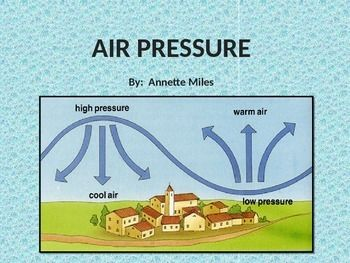

**So,We have understood the terms used in our dataset.Now we have to proceed with the second step i.e.,loading the data into the dataframe**

#2.) Loading the data into the dataframe

***Lets check basic structures of our data and see how beautifull does it look**

In [2]:
#lets import important libraries which we will be using throughout the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as mno
import warnings
from sklearn.decomposition import PCA, LatentDirichletAllocation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from sklearn import neighbors
from sklearn.svm import SVR
import time
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [3]:
#lets mount our drive and upload the dataset
df= pd.read_csv('/content/drive/MyDrive/ Almabetter/ Capstone Project(Appliances Energy Prediction)/data_application_energy.csv')


Our drive is already mounted.So we just have to upload our data.
By the ay we can use 'drive.mount("/content/drive", force_remount=True)'to remount our drive.

In [ ]:
#lets check the type of our dastaset
type(df)  

pandas.core.frame.DataFrame

In [ ]:
#lets check how our data looks from top
df.head() 

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [ ]:
#lets check how our data looks from bottom
df.tail()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.7,45.590000,23.20,52.400000,24.796667,1.0,24.500000,44.500000,24.7000,50.07400,23.2,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.7,45.590000,23.23,52.326667,24.196667,1.0,24.557143,44.414286,24.7000,49.79000,23.2,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.7,45.730000,23.23,52.266667,23.626667,1.0,24.540000,44.400000,24.7000,49.66000,23.2,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.7,45.790000,23.20,52.200000,22.433333,1.0,24.500000,44.295714,24.6625,49.51875,23.2,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784
19734,2016-05-27 18:00:00,430,10,25.500000,46.600000,25.264286,42.971429,26.823333,41.156667,24.7,45.963333,23.20,52.200000,21.026667,1.0,24.500000,44.054000,24.7360,49.73600,23.2,46.8450,22.200000,755.2,57.000000,4.000000,27.000000,13.200000,34.118851,34.118851


In [ ]:
#lets check the shape of our data
df.shape


(19735, 29)

In [ ]:
#lets explore the statistics of our data
df.describe()


,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,7.910939,54.609083,20.267106,35.388200,22.029107,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,6.090347,31.149806,2.109993,5.114208,1.956162,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,3.626667,30.025000,18.700000,31.500000,20.790000,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,7.300000,55.290000,20.033333,34.863333,22.100000,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,11.256000,83.226667,21.600000,39.000000,23.390000,46.536000,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,28.290000,99.900000,26.000000,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [ ]:
#lets check information of our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [ ]:
#lets check uniqueness of our data
df.apply(lambda x: len(x.unique()))

date           19735
Appliances        92
lights             8
T1               722
RH_1            2547
T2              1650
RH_2            3376
T3              1426
RH_3            2618
T4              1390
RH_4            2987
T5              2263
RH_5            7571
T6              4446
RH_6            9709
T7              1955
RH_7            5891
T8              2228
RH_8            6649
T9               924
RH_9            3388
T_out           1730
Press_mm_hg     2189
RH_out           566
Windspeed        189
Visibility       413
Tdewpoint       1409
rv1            19735
rv2            19735
dtype: int64

Our data is looking very beautifull.It has many features 
* Number of entries : 19735
* No of features : 27 ( 2 Random Variables included )
* Target Variable : Appliances
* All features are numerical. No categorical variables. 

Okay we are now ready to proceed for our second step i.e.,**Cleaning Data(X-Ray of Data)**

#2.) Cleaning Data

In [ ]:
#lets check is there any null values or not
df.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

**Great** that there is no null values is our data.It has made our work very easier.Lets proceed and check is there outliers in our data or not------


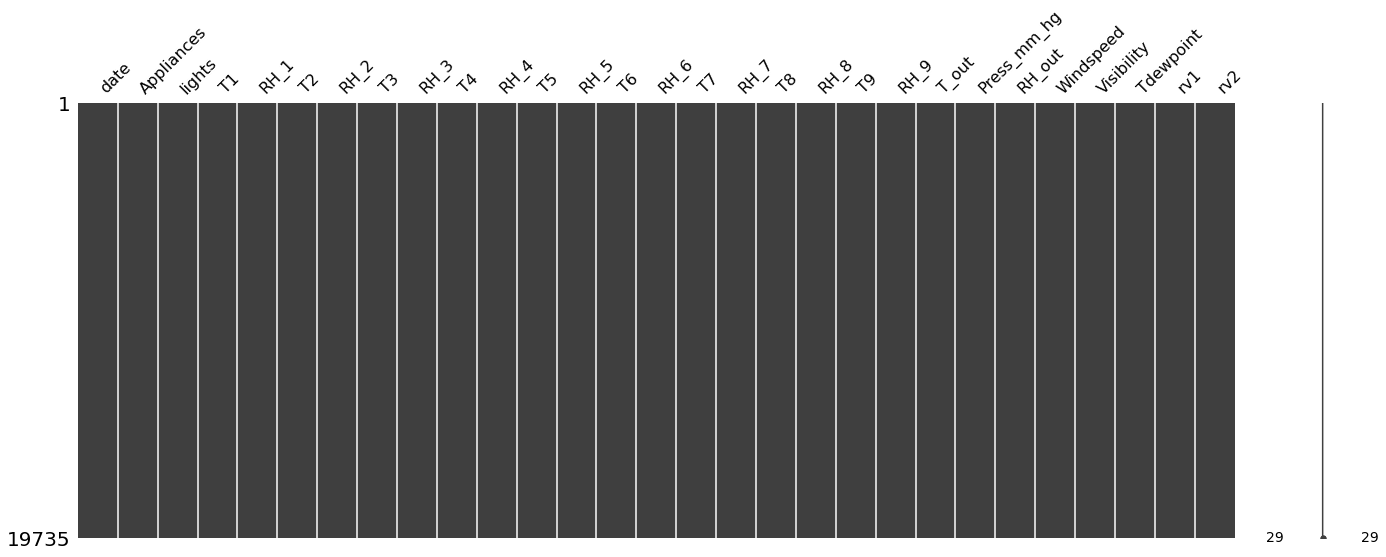

In [4]:
#lets se  null values in the form of graph using missingno
pd.DataFrame(df.isna().sum(), columns=["records missing"]).T
mno.matrix(df, figsize = (23,8))

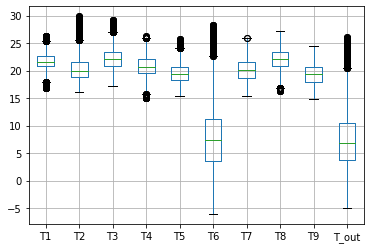

In [31]:
df.boxplot(['T1','T2','T3','T4','T5','T6','T7','T8','T9','T_out'])


So its showing temperature distribution in our dataset and it shows that there is no outliers in our Temperature.Its very good for me because i do not have to remove any temperature from it.lets represent the same using some colourfull representation.Lets use seaborn library-----------------

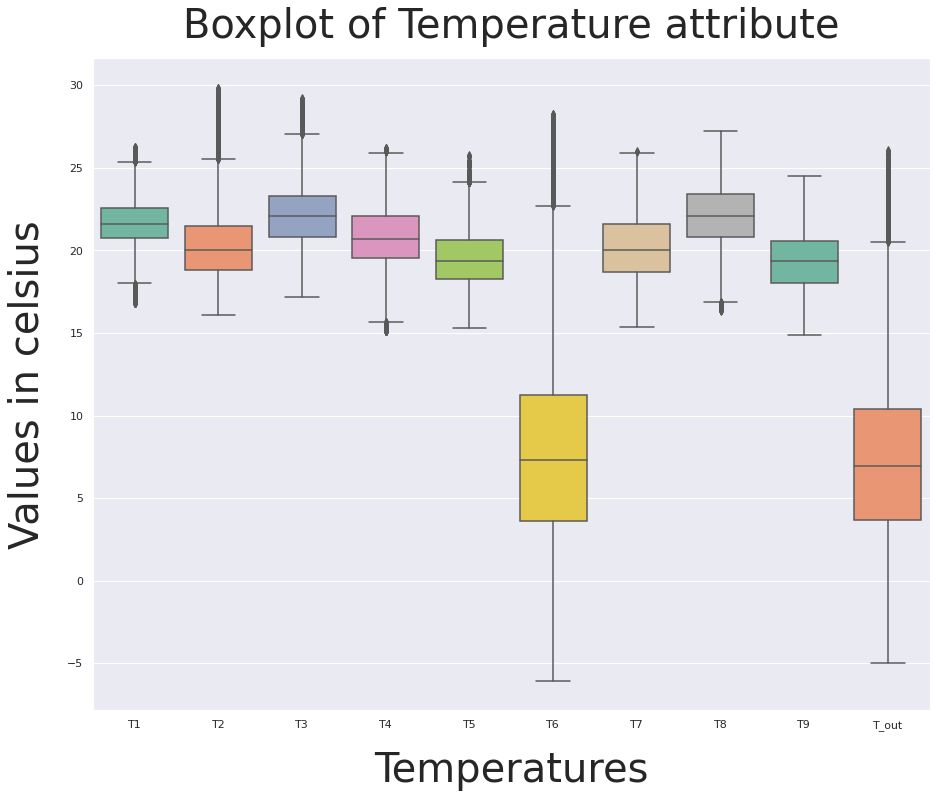

In [56]:
#lets check oulier ussing seaborn library
ax = sns.boxplot(data = df[["T1", "T2","T3","T4","T5","T6","T7","T8","T9","T_out"]], orient = "v", palette = "Set2")
ax.set_xlabel("Temperatures", fontsize = 40, labelpad = 20)
ax.set_ylabel("Values in celsius", fontsize = 40, labelpad = 20)
ax.set_title("Boxplot of Temperature attribute", fontsize = 40,
            pad = 20)
sns.set(rc={'figure.figsize':(15,12)})

**Its looking very beautifull.Lets proceed for other features and check is there any outlier or not**

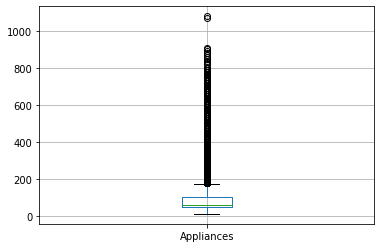

In [15]:
#lets check outlier for appliance
df.boxplot('Appliances')
 

Text(0, 0.5, 'Values')

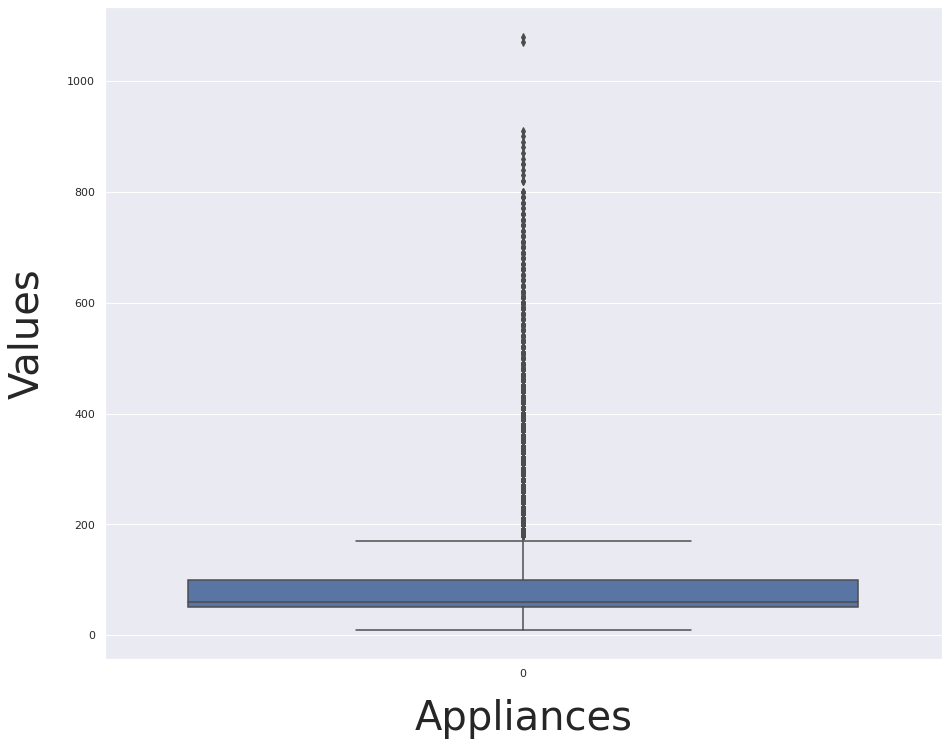

In [55]:
#lets represent the above using seaborn library
ax= sns.boxplot(data= df['Appliances'])
ax.set_xlabel('Appliances',fontsize=40, labelpad=20)
ax.set_ylabel('Values',fontsize=40, labelpad=20)